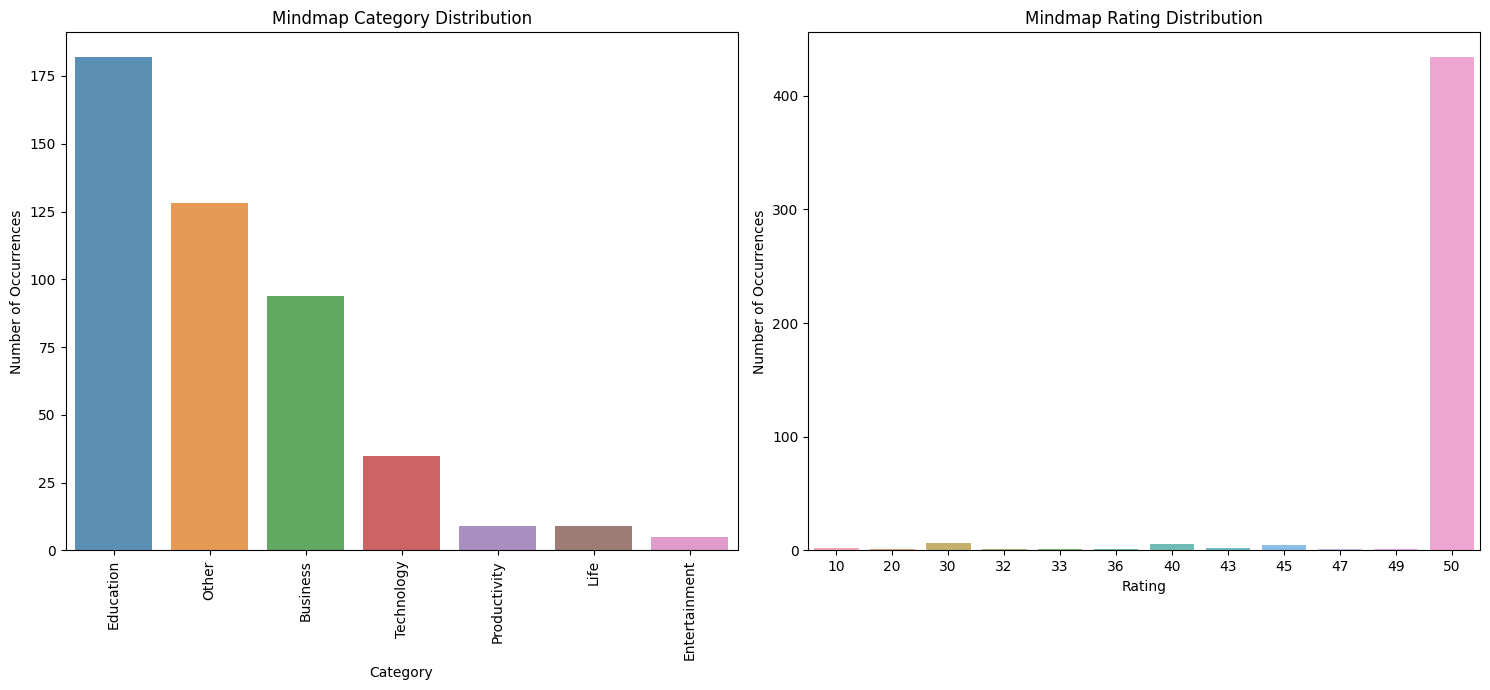

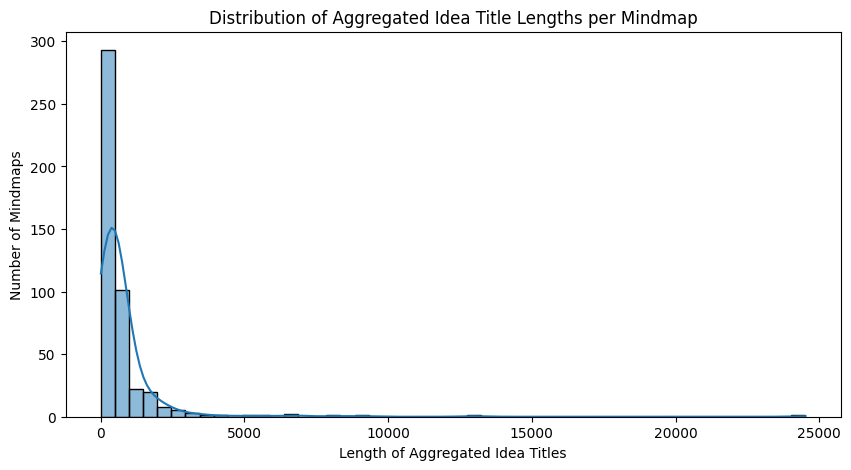

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "../data/raw/public_maps.csv"  # Replace with your actual path
data = pd.read_csv(data_path)

# Group by 'map_id' and aggregate data at mindmap level
mindmap_level_data = data.groupby('map_id').agg({
    'map_category_name': 'first',
    'map_rating': 'first',
    'idea_title': ' '.join
}).reset_index()



# Distribution of categories and ratings at the mindmap level
mindmap_category_distribution = mindmap_level_data['map_category_name'].value_counts()
mindmap_rating_distribution = mindmap_level_data['map_rating'].value_counts()

# Create visualizations for distributions
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the category distribution
sns.barplot(x=mindmap_category_distribution.index, y=mindmap_category_distribution.values, alpha=0.8, ax=axs[0])
axs[0].set_title('Mindmap Category Distribution')
axs[0].set_ylabel('Number of Occurrences')
axs[0].set_xlabel('Category')
axs[0].tick_params(axis='x', rotation=90)

# Plot the rating distribution
sns.barplot(x=mindmap_rating_distribution.index, y=mindmap_rating_distribution.values, alpha=0.8, ax=axs[1])
axs[1].set_title('Mindmap Rating Distribution')
axs[1].set_ylabel('Number of Occurrences')
axs[1].set_xlabel('Rating')

plt.tight_layout()
plt.show()

# Compute the length of aggregated idea titles for each mindmap
mindmap_level_data['idea_title_length'] = mindmap_level_data['idea_title'].apply(len)

# Plot the distribution of idea title lengths
plt.figure(figsize=(10, 5))
sns.histplot(mindmap_level_data['idea_title_length'], bins=50, kde=True)
plt.title('Distribution of Aggregated Idea Title Lengths per Mindmap')
plt.xlabel('Length of Aggregated Idea Titles')
plt.ylabel('Number of Mindmaps')
plt.show()
